### Math2Tex

In [2]:
%load_ext autoreload
%autoreload 2

from compiler.lexer import Lexer

lexer = Lexer()

print("----------------------------------------------")
file = open("examples/" + 'example1.txt', 'r')
print(file.read())
file.close()
print("----------------------------------------------")

lexer.lex_file("examples/" + 'example1.txt')


----------------------------------------------
math{
    equation{
        f(x)=2
    }
}
----------------------------------------------


[KW_MATH(math),
 L_CURL_BRACKET({),
 KW_EQUATION(equation),
 L_CURL_BRACKET({),
 IDENTIFIER(f),
 L_PAREN((),
 IDENTIFIER(x),
 R_PAREN()),
 EQUOP_EQUAL(=),
 LIT_INT(2),
 R_CURL_BRACKET(}),
 R_CURL_BRACKET(})]

In [5]:
from compiler.parser import Parser
import pprint

lexer = Lexer()
lexems = lexer.lex_file("examples/" + 'example1.txt')
parser = Parser(lexems)
ast = parser.parse()
print(ast)

Parsing successful!


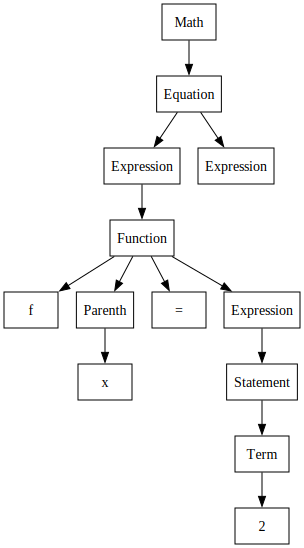

In [7]:
from compiler.graph import GraphGenerator

graph = GraphGenerator()
graph.generate_graph(ast)